**Use of the lego Dataset to work on Project 2: Data Analysis in Python**


Dataset Used: https://www.kaggle.com/datasets/mterzolo/lego-sets?select=lego_sets.csv

The dataset we used is a public dataset posted on Kaggle. The initial dataset was created by user 'MattieTerzolo' for the simple purpose of curiousity regarding questions regarding the world of Legos. The dataset is in a lego_sets.csv file with 14 various columns. Some of the columns include recommended ages, set name, price, piece count, and review ratings.

Legos have been a staple in children’s entertainment for decades and continue to thrive in today’s climate with hundreds of thousands of children actively enjoying this renowned product. Developed from a wooden toy in the 1930s, The Lego Group is now estimated to be worth over 11 billion dollars, with hundreds of different products readily available. While many have come and gone with their own replicas, Lego has truly skyrocketed to become one of its own in the toy industry. 

**Questions:**

1. What features might contribute to a higher star rating?
2. How many products fall within the different price ranges? (We would have to categoirize this into low, medium, high).
3. Piece count of lego sets based on themes. Which themes have the highest and lowest piece counts on average?
4. Review difficulty based on age
5. What is the correlation between the piece count and the price of each set?
6. Interesting idea for a question (WE CHOOSE A THEME AND ANALYZE THE PRICE DIFFERENCES BETWEEN HEROES/VILLAINS LIKE BATMAN VS JOKER)??

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

lego = pd.read_csv("datasets/lego_dataset.csv")
lego.describe()

,list_price,num_reviews,piece_count,play_star_rating,prod_id,star_rating,val_star_rating
count,12261.000000,10641.000000,12261.000000,10486.000000,1.226100e+04,10641.000000,10466.000000
mean,65.141998,16.826238,493.405921,4.337641,5.983675e+04,4.514134,4.228960
std,91.980429,36.368984,825.364580,0.652051,1.638115e+05,0.518865,0.660282
min,2.272400,1.000000,1.000000,1.000000,6.300000e+02,1.800000,1.000000
25%,19.990000,2.000000,97.000000,4.000000,2.103400e+04,4.300000,4.000000
50%,36.587800,6.000000,216.000000,4.500000,4.206900e+04,4.700000,4.300000
75%,70.192200,13.000000,544.000000,4.800000,7.092200e+04,5.000000,4.700000
max,1104.870000,367.000000,7541.000000,5.000000,2.000431e+06,5.000000,5.000000


In [74]:
lego.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ages               12261 non-null  object 
 1   list_price         12261 non-null  float64
 2   num_reviews        10641 non-null  float64
 3   piece_count        12261 non-null  float64
 4   play_star_rating   10486 non-null  float64
 5   prod_desc          11884 non-null  object 
 6   prod_id            12261 non-null  float64
 7   prod_long_desc     12261 non-null  object 
 8   review_difficulty  10206 non-null  object 
 9   set_name           12261 non-null  object 
 10  star_rating        10641 non-null  float64
 11  theme_name         12258 non-null  object 
 12  val_star_rating    10466 non-null  float64
 13  country            12261 non-null  object 
dtypes: float64(7), object(7)
memory usage: 1.3+ MB


The line below shows the name of all the themes of the various Lego sets in the database.

In [75]:
print(lego["theme_name"].unique())

['Angry Birds™' 'Architecture' 'BOOST' 'BrickHeadz' 'City' 'Juniors'
 'Classic' 'Creator 3-in-1' 'Creator Expert' 'THE LEGO® BATMAN MOVIE'
 'DC Comics™ Super Heroes' 'DIMENSIONS™' 'DC Super Hero Girls' 'Disney™'
 'DUPLO®' 'Elves' 'Friends' 'Ghostbusters™' 'Ideas'
 'Indoraptor Rampage at Lockwood Estate' 'Carnotaurus Gyrosphere Escape'
 'T. rex Transport' 'Jurassic Park Velociraptor Chase'
 'Dilophosaurus Outpost Attack' "Blue's Helicopter Pursuit"
 'Stygimoloch Breakout' 'Pteranodon Chase' 'Marvel Super Heroes'
 'MINDSTORMS®' 'Minecraft™' 'Minifigures' 'NEXO KNIGHTS™'
 'THE LEGO® NINJAGO® MOVIE™' 'NINJAGO®' 'SERIOUS PLAY®' 'Speed Champions'
 'Star Wars™' 'Technic' 'Power Functions' 'LEGO® Creator 3-in-1' nan]


In [76]:
print(lego["country"].unique())

['US' 'AU' 'AT' 'BE' 'CA' 'CH' 'CZ' 'DE' 'DN' 'ES' 'FI' 'FR' 'GB' 'IE'
 'IT' 'LU' 'NO' 'NL' 'NZ' 'PL' 'PT']


In [77]:
#current = (lego[["theme_name","set_name", "list_price"]])
distinctsets = lego.drop_duplicates(subset = 'set_name')

sortedByPrice = distinctsets.sort_values(by = 'list_price', ascending = False)
sortedByPrice[['set_name','list_price']].head(10)
# print(current.head(10))

##THIS CODE HAS TO BE CHANGED SO THAT WE SORT FIRST AND THEN DROP DUPLICATES TO GET THE HIGHEST LIST PRICE

,set_name,list_price
694,Millennium Falcon™,799.99
613,Identity and Landscape Kit,789.99
610,Connections Kit,754.99
640,Death Star™,499.99
611,Window Exploration Bag,484.99
165,Taj Mahal,369.99
499,LEGO® MINDSTORMS® EV3,349.99
404,Firehouse Headquarters,349.99
248,The Disney Castle,349.99
728,Porsche 911 GT3 RS,299.99


In [78]:
distinctthemes = lego.drop_duplicates(subset = 'theme_name')

sortedByCount = distinctthemes.sort_values(by = 'piece_count', ascending = False)

sortedByCount[['theme_name','piece_count']].head(10)
##THIS CODE HAS TO BE CHANGED SAME AS ABOVE.


,theme_name,piece_count
165,Creator Expert,5923.0
404,Ghostbusters™,4634.0
248,Disney™,4080.0
181,THE LEGO® BATMAN MOVIE,3444.0
512,Minecraft™,2863.0
610,SERIOUS PLAY®,2455.0
569,THE LEGO® NINJAGO® MOVIE™,2295.0
727,Technic,1862.0
537,NEXO KNIGHTS™,1426.0
628,Star Wars™,1413.0


Text(0, 0.5, 'Theme')

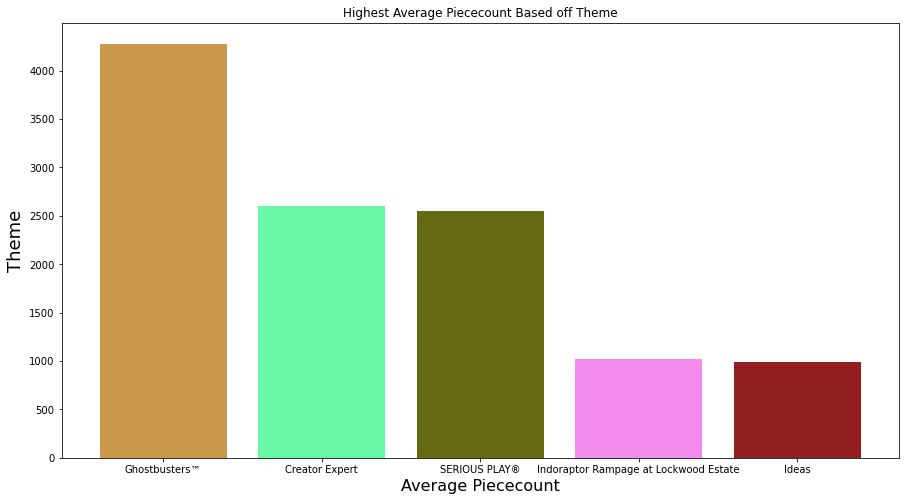

In [40]:
#Question 3 
# #Piece count of lego sets based on themes. Which themes have the highest and lowest piece counts on average? #Data Calculations & Statistics 
theme_grouped = lego.groupby("theme_name") 
piece_by_theme = theme_grouped["piece_count"] 
meann = piece_by_theme.mean() 
piece_by_theme.median() 
top5 = meann.nlargest(5).reset_index() 
plt.figure(figsize=(15, 8)) 
bar_colors = np.random.rand(5, 3) 
plt.bar(top5["theme_name"], top5["piece_count"], color= bar_colors) 
plt.title("Highest Average Piececount Based off Theme") 
plt.xlabel("Average Piececount", fontsize = 16) 
plt.ylabel("Theme", fontsize = 18) # Find the top 5 themes based on mean